
####---SOPHIA RAZZAQ---------

#----------------------------------------------------DATA WRANGLING---------------------------------------------

#LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#DATASET

#PART **1**

In [ ]:
df = pd.read_csv("House Pricing.csv")

##CHECKING DATA

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.head(5)  #first 5 rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_category,is_charles_river
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Old,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Old,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,Old,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,Middle-aged,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Middle-aged,False


In [ ]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [ ]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
df.shape

(506, 14)

check for null values

In [ ]:
null = df.isnull()
nullt = null.sum().sum()
print(f"Number of null values found: {nullt}")

Number of null values found: 0


checking for nan or '?' marks

In [ ]:
question_marks_mask = df == "?"
question_marks_count = question_marks_mask.sum().sum()

nan_mask = df.isna()
nan_count = nan_mask.sum().sum()
# Print the results
print(f"Number of question marks found: {question_marks_count}")
print(f"Number of NaN values found: {nan_count}")

Number of question marks found: 0
Number of NaN values found: 0


checking for unique values

In [ ]:
# Iterate over each column in the dataset
for column in df.columns:
    unique_values = df[column].unique()  # Get the unique values of the column
    num_unique_values = len(unique_values)  # Get the number of unique values
    print(f"Column: {column}")
    print(f"Number of Unique Values: {num_unique_values}")
    print(f"Unique Values: {unique_values}")
    print("\n")

Column: crim
Number of Unique Values: 504
Unique Values: [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.7070

checking for outliers through boxplot

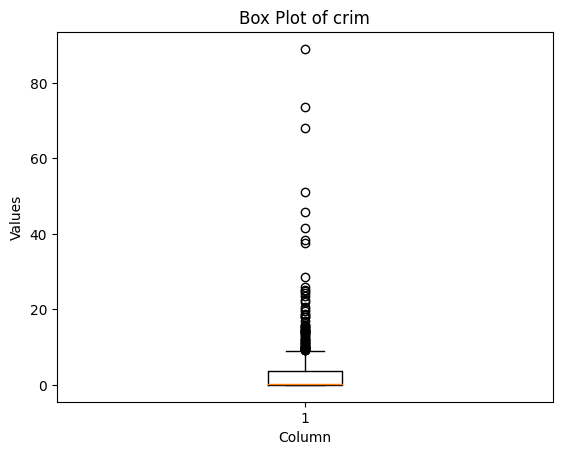

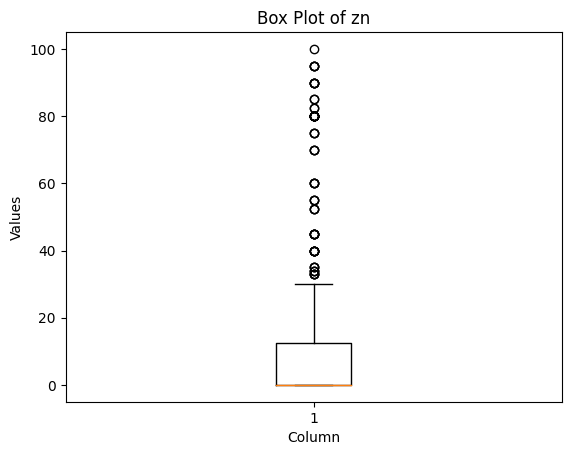

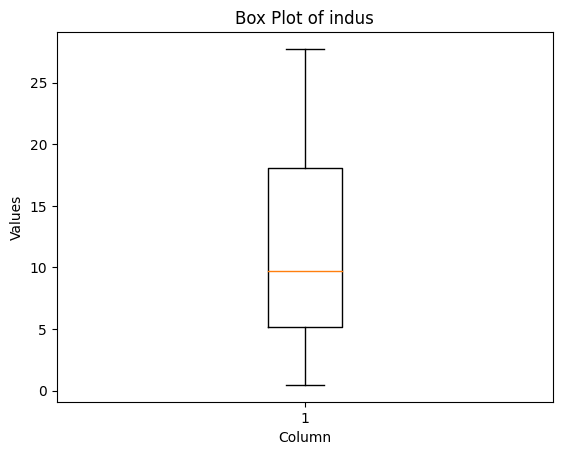

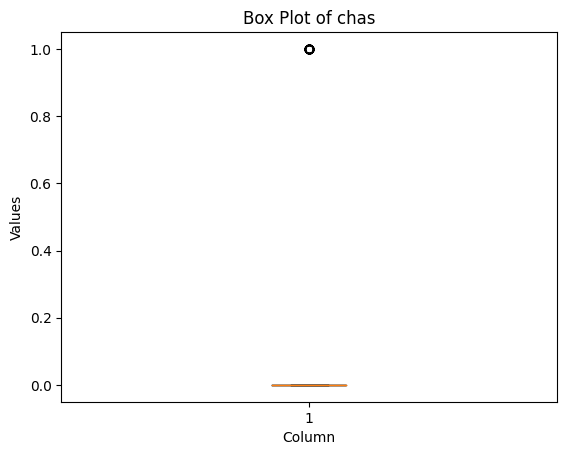

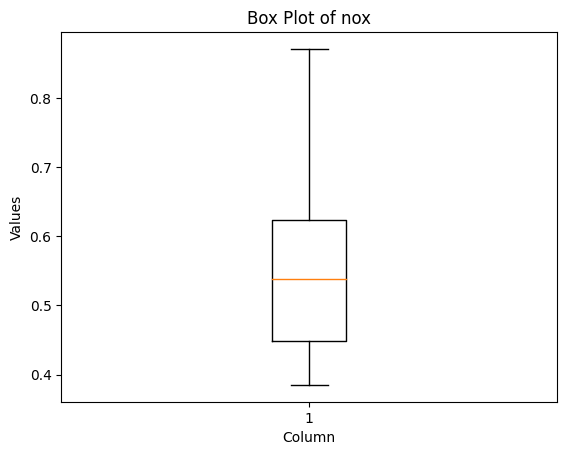

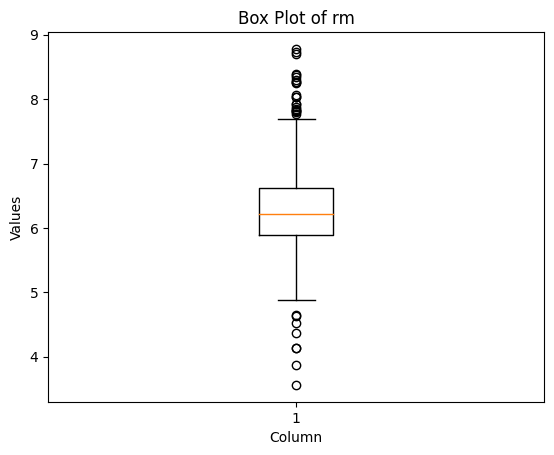

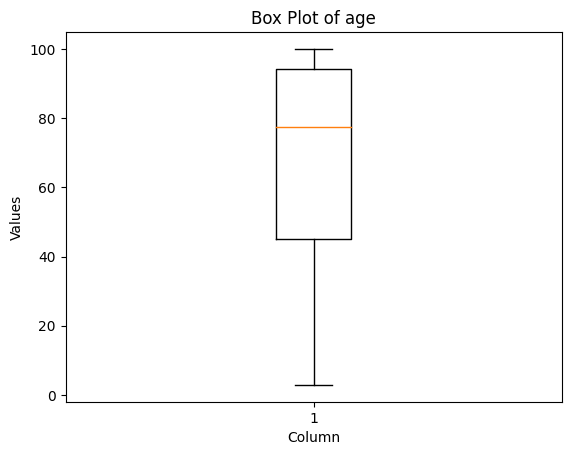

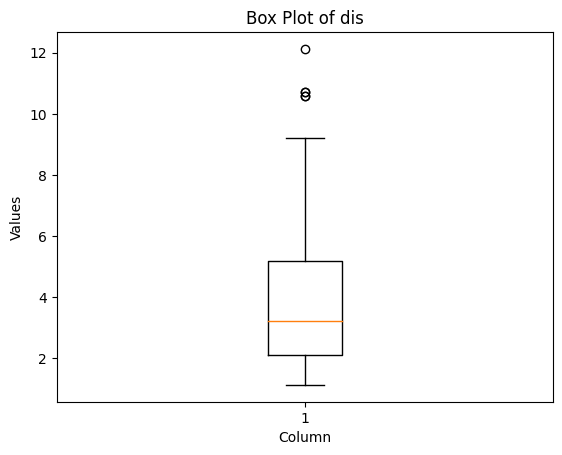

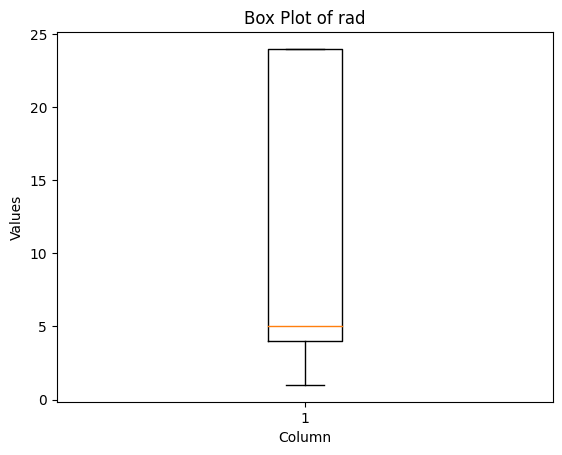

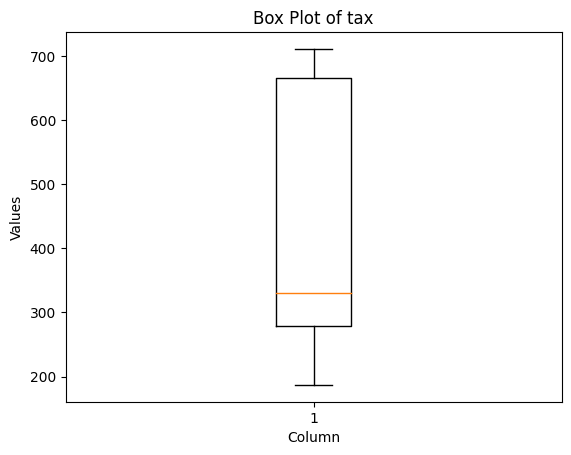

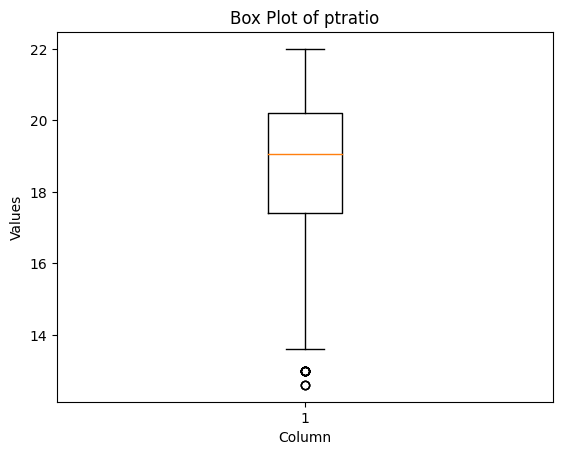

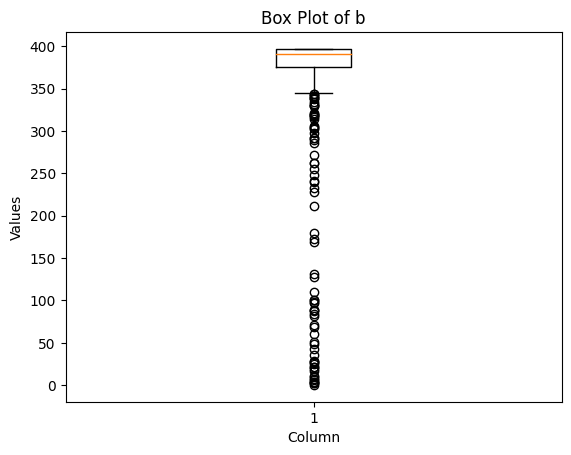

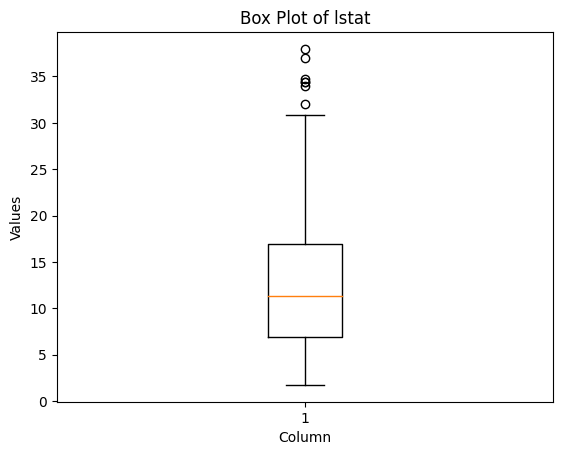

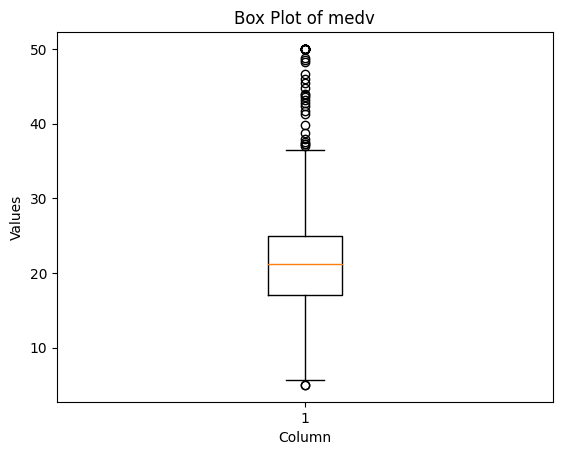

In [ ]:
for column in df.columns:

    plt.boxplot(df[column])

    plt.title("Box Plot of " + column)
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

#PART **2**
    


In [ ]:
df['age']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 506, dtype: float64

checking for any noise in coloumn 'age'

In [ ]:
check_null = df['age'].isnull().sum()
print(f"Number of Null Values in 'age' column: {check_null}")

missing_values = df['age'].isin(['', 'NA', 'NaN', 'unknown', 'noise']).sum()
print(f"Number of Missing or Noisy Values in 'age' column: {missing_values}")

Number of Null Values in 'age' column: 0
Number of Missing or Noisy Values in 'age' column: 0


making bins

In [ ]:
bin_edges = [0, 30, 60, df['age'].max()]
bin_labels = ['Young', 'Middle-aged', 'Old']

df['age_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, include_lowest=True)

Count the number of data points in each age category and visualizing it for better understanding

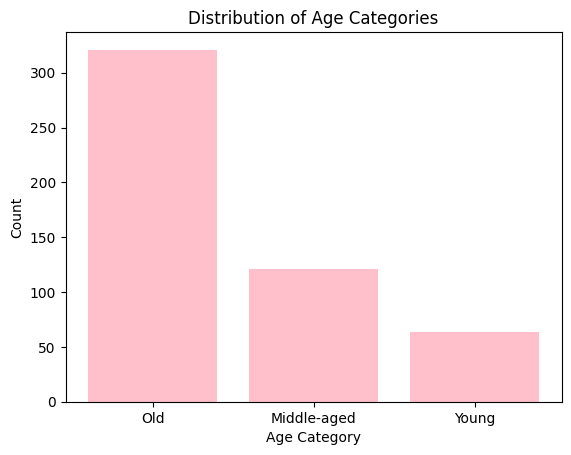

In [ ]:
age = df['age_category'].value_counts()

plt.bar(age.index, age.values, color='pink')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()

In [ ]:
df['age']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 506, dtype: float64

#PART **3**

In [ ]:
df['is_charles_river'] = df['chas'].map({1: True, 0: False})
#df['is_charles_river'] = df['chas'].map({1: 1, 0: 0})

In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'age_category', 'is_charles_river'],
      dtype='object')

In [ ]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_category,is_charles_river
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Old,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Old,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,Old,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,Middle-aged,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Middle-aged,False


In [ ]:
df['is_charles_river'].unique()

array([False,  True])

#PART **4**










detecting and removing outliers in data (for numerical cols only)

In [ ]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
#columns= df.columns
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

df_no_outliers = remove_outliers_iqr(df, columns)
print(df_no_outliers.head(5))
df1=df_no_outliers

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
5  0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172  96.1  5.9505    5  311     15.2   

        b  lstat  medv age_category  is_charles_river  
0  396.90   4.98  24.0          Old             False  
1  396.90   9.14  21.6          Old             False  
5  394.12   5.21  28.7  Middle-aged             False  
6  395.60  12.43  22.9          Old             False  
7  396.90  19.15  27.1          Old             False  


In [ ]:
df1.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_category,is_charles_river
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Old,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Old,False
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,Middle-aged,False
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,Old,False
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,Old,False


#PART **5**





detecting and removing noise

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()  # Get the unique values of the column
    num_unique_values = len(unique_values)  # Get the number of unique values
    print(f"Column: {column}")
    print(f"Number of Unique Values: {num_unique_values}")
    print(f"Unique Values: {unique_values}")
    print("\n")

Column: crim
Number of Unique Values: 504
Unique Values: [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.7070

by manual checing we found no noise but to make sure we will check some famous noise words that are usually found in data

In [ ]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'age_category', 'is_charles_river'],
      dtype='object')

first lets fill the null values(if any with a temporary letter) adn then with a mean value afterwards

In [ ]:
columns_df1 = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv', 'age_category', 'is_charles_river']

In [ ]:
for column in columns_df1:
    df[column] = df[column].fillna('O')

    noisy_values = ['', 'NA', 'NaN', 'unknown', 'noise', '?', 'No Idea', 'asdf', 'nan']
    df[column] = df[column].replace(noisy_values, 'O')

    check_null = df[column].isnull().sum()
    missing_values = df[column].isin(noisy_values).sum()

    # Print the results for each column
    print(f"Column '{column}': Null values: {check_null}, Missing values: {missing_values}")

Column 'crim': Null values: 0, Missing values: 0
Column 'zn': Null values: 0, Missing values: 0
Column 'indus': Null values: 0, Missing values: 0
Column 'chas': Null values: 0, Missing values: 0
Column 'nox': Null values: 0, Missing values: 0
Column 'rm': Null values: 0, Missing values: 0
Column 'age': Null values: 0, Missing values: 0
Column 'dis': Null values: 0, Missing values: 0
Column 'rad': Null values: 0, Missing values: 0
Column 'tax': Null values: 0, Missing values: 0
Column 'ptratio': Null values: 0, Missing values: 0
Column 'b': Null values: 0, Missing values: 0
Column 'lstat': Null values: 0, Missing values: 0
Column 'medv': Null values: 0, Missing values: 0
Column 'age_category': Null values: 0, Missing values: 0
Column 'is_charles_river': Null values: 0, Missing values: 0


now our data is clean at this point with any outliers and noisy data

lets check through boxplot

In [ ]:
columnss_df1 = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

taking only numerical coloumns for boxplot

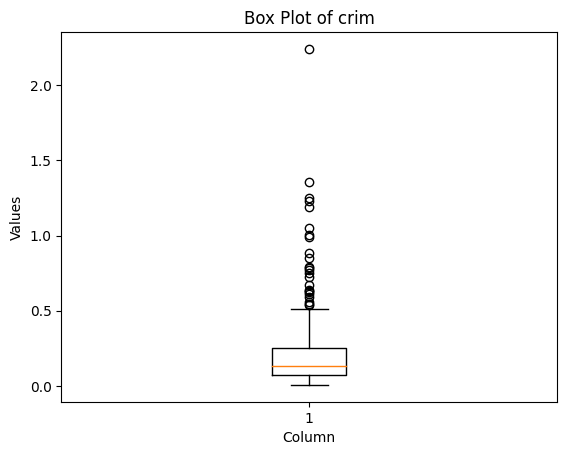

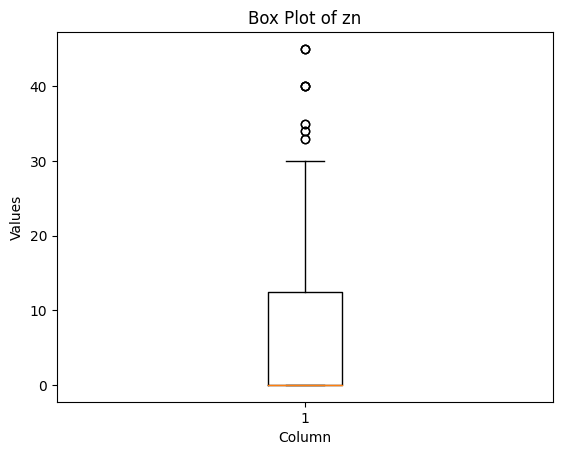

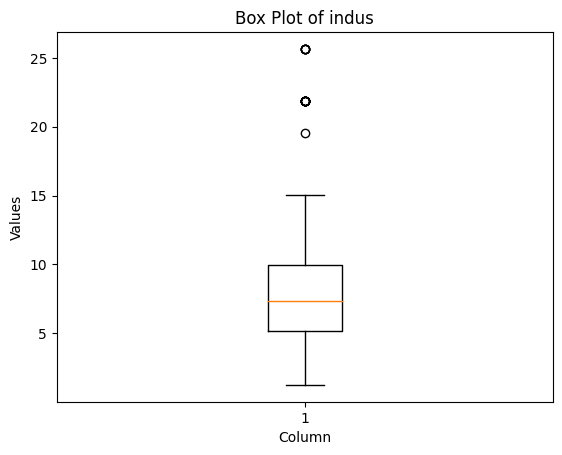

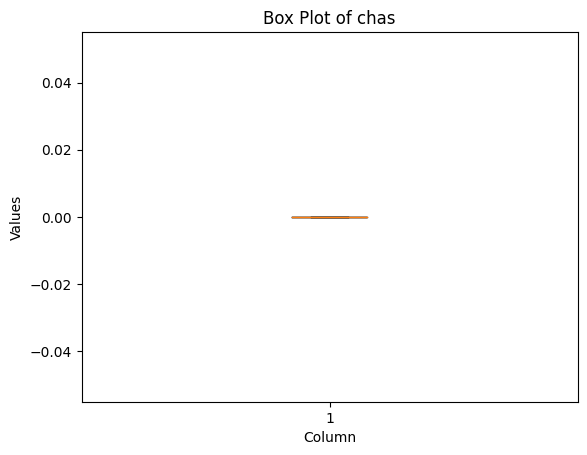

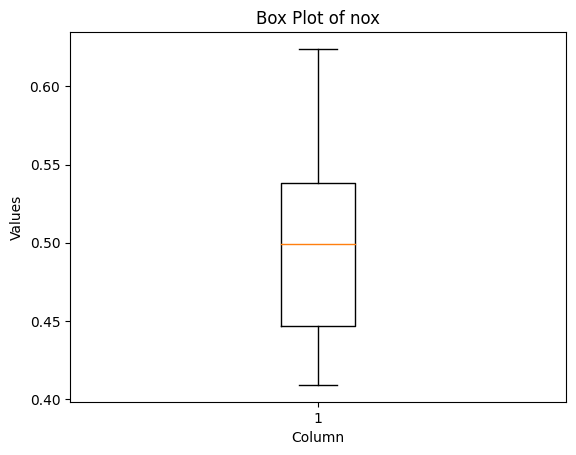

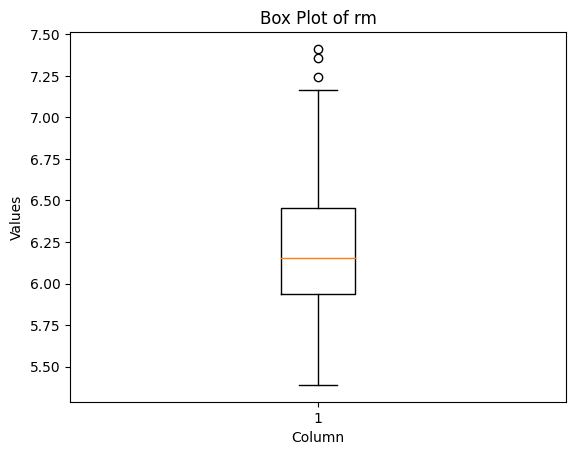

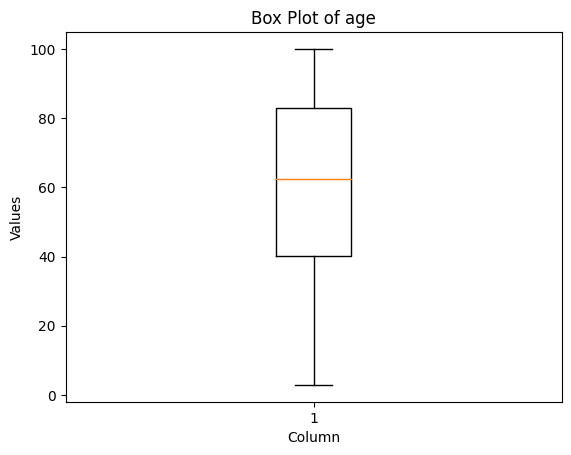

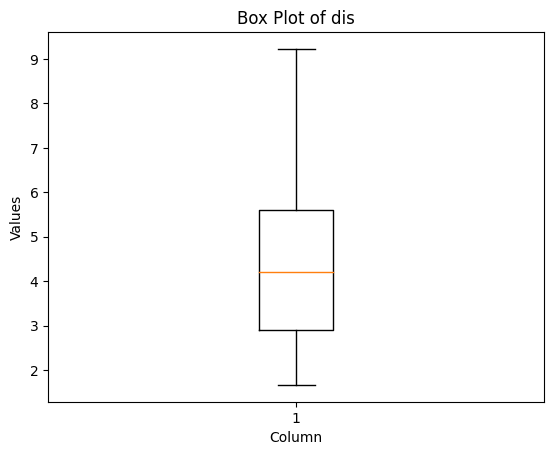

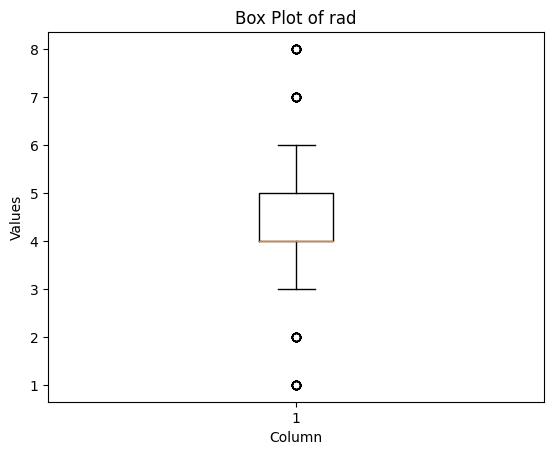

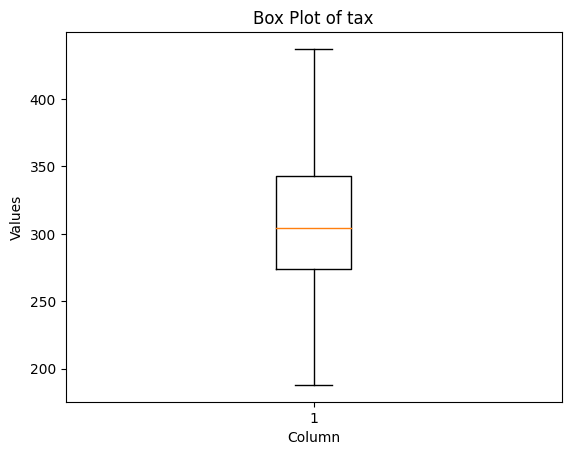

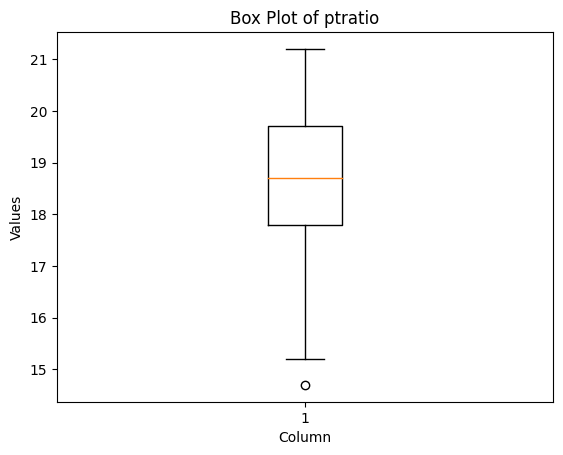

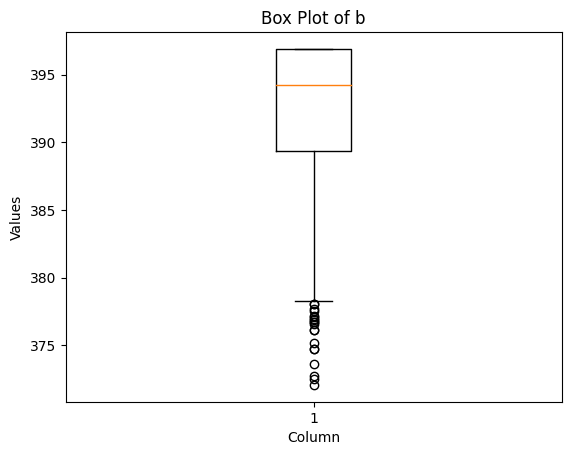

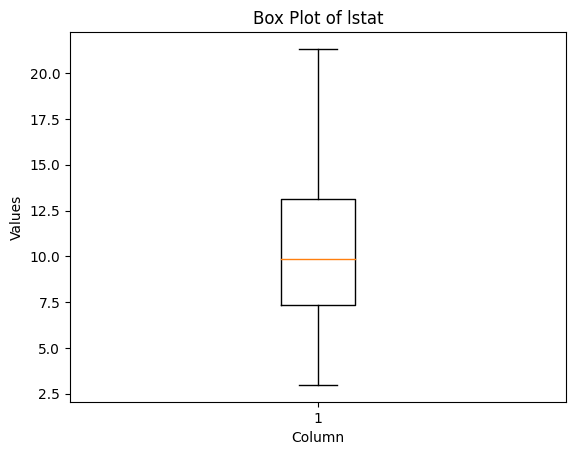

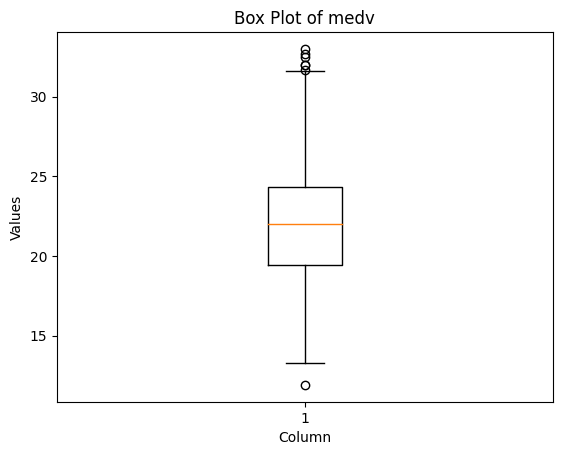

In [ ]:
for column in columnss_df1:

    plt.boxplot(df1[column])

    plt.title("Box Plot of " + column)
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

#PART **6**

In [ ]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'age_category', 'is_charles_river'],
      dtype='object')

In [ ]:
df1['rm_smooth'] = df['rm'].rolling(window=3, min_periods=1, center=True).mean()

In [ ]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'age_category', 'is_charles_river',
       'rm_smooth'],
      dtype='object')

#PART **7**

normalizing 'tac' adn 'lsat(lower population)

In [ ]:
columns_to_normalize = ['tax', 'lstat']
for column in columns_to_normalize:
    min_value = df1[column].min()
    max_value = df1[column].max()
    df1[column + '_normalized'] = (df1[column] - min_value) / (max_value - min_value)

you can see the 'tax_normalized' and 'lstat normalized' column added

In [ ]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'age_category', 'is_charles_river',
       'rm_smooth', 'tax_normalized', 'lstat_normalized'],
      dtype='object')

#PART **8**

In [ ]:
from sklearn.linear_model import LinearRegression

X = df1[['rm']]  # Input feature
y = df1['medv']  # Target variable

regression_model = LinearRegression()
regression_model.fit(X, y)

# Print the coefficients
print('Intercept:', regression_model.intercept_)
coefficient=print('Coefficient:', regression_model.coef_)

Intercept: -23.83905131868149
Coefficient: [7.40476277]


###Interpretation
In summary, for each additional room in dwelling, the median value of "medv" is expected to increase by approximately 7.40476277, assuming all other factors remain constant. The intercept value represents the baseline median value of "medv" when the "rm" variable is zero.

#PART **9**

In [ ]:
model = sm.OLS(y, X)
#ordinary least squares (OLS) model
results = model.fit()

In [ ]:
coefficient = results.params['rm']
p_value = results.pvalues['rm']
confidence_interval = results.conf_int().loc['rm']

In [ ]:
if p_value < 0.05:
    if coefficient > 0:
        print("There is a statistically significant positive relationship between 'rm' and 'medv'.")
    elif coefficient < 0:
        print("There is a statistically significant negative relationship between 'rm' and 'medv'.")
else:
    print("There is insufficient evidence to conclude a significant relationship between 'rm' and 'medv'.")

There is a statistically significant positive relationship between 'rm' and 'medv'.


###Interppretation
  'RM' and 'MEDV' has a positive relation meaning when the number of rooms per dwelling incraeses the median value of owner-occupied homes in $1000's also increases

#======================THE END FOR QUESTION 2 ==========================